In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
import seaborn as sb
sb.set()
import plotly.offline as pof
import plotly.graph_objs as go
pof.init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

DATA_PATH_KAGGLE = "/Users/bguillouet/Insa/DeepLearning/data/HARWS/kaggle/"
DATA_PATH_UCI = "/Users/bguillouet/Insa/DeepLearning/data/HARWS/UCI HAR Dataset/"


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Read Kaggle Data

Les données téléchargeables sous Kaggle sont au format csv et très facile à charger dans une DataFrame pandas.

*NB*: La colonne de réponse *Activity* est représenté par des *strings* 

In [2]:
train_kaggle = pd.read_csv(DATA_PATH_KAGGLE+'/train.csv')
test_kaggle  = pd.read_csv(DATA_PATH_KAGGLE+'/test.csv')

test_kaggle.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


## Read UCI Data

Les données d'UCI sont un peu plus compliquées à gérer car répartie en différents fichiers, mais on peut très facilement recréer les mêmes données.

*NB*: La colonne de réponse *Activity* est représenté par des *integer* avec les correspondances suivantes:
    * 1 : WALKING
    * 2 : WALKING UPSTAIRS
    * 3 : WALKING DOWNSTAIRS
    * 4 : SITTING
    * 5 : STANDING
    * 6 : LAYING

In [3]:
def make_dataframe(data_path, dtype = "train"):
    """
    Function to build train or test dataframe
    
    INPUT
    data_path = path of the directory of the original UCL Data
    dtype = either 'test' or 'train'
    
    OUTPUT
    X = the train or test DataFrame
    """
    data_path 
    
    # Read Column names files and convert it to a list
    with open(data_path +'features.txt', 'r') as content_file:
        features_names = content_file.read()
    columns_names = list(map(lambda x : x.split(" ")[1],features_names.split("\n")[:-1]))
    
    # Read the features files
    X = pd.read_csv(data_path + dtype + '/X_'+ dtype + '.txt', delim_whitespace=True, header=None, names=columns_names)
    
    # Read subject names and add it to the Features Data Frame
    with open(data_path + dtype + '/subject_'+ dtype + '.txt', 'r') as content_file:
        subject_train = content_file.read()
    X.loc[:,"subject"] = list(map(int,subject_train.split("\n")[:-1]))
    
    # Read response file and add it to the Feature DataFrame
    with open(data_path + dtype + '/y_'+ dtype + '.txt', 'r') as content_file:
        y = content_file.read()
    X.loc[:,"Activity"] = list(map(int,y.split("\n")[:-1]))
    
    return X

In [4]:
train = make_dataframe(DATA_PATH_UCI, dtype = "train")
test = make_dataframe(DATA_PATH_UCI, dtype = "test")
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5


## PCA 

### Librairies Spécifiques

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Perform PCA

In [6]:
X = train.values[:,:-1]
y = train.values[:,-1]
pca = PCA()
X_r = pca.fit_transform(X)

### Plot Function

In [7]:
label_dic = {1 : "WALKING",
2 : "WALKING UPSTAIRS",
3 : "WALKING DOWNSTAIRS",
4 : "SITTING",
5 : "STANDING",
6 : "LAYING"}

def plot_pca(X_R,fig,ax,nbc,nbc2):
    for i in range(6):
        xs = X_r[y==i+1,nbc-1]
        ys = X_r[y==i+1, nbc2-1]
        label = label_dic[i+1]
        color = cmaps(i)
        ax.scatter(xs, ys, color=color, alpha=.8, s=1, label=label)
        ax.set_xlabel("PC%d : %.2f %%" %(nbc,pca.explained_variance_ratio_[nbc-1]*100), fontsize=10)
        ax.set_ylabel("PC%d : %.2f %%" %(nbc2,pca.explained_variance_ratio_[nbc2-1]*100), fontsize=10)
        

def plot_feature_importance(pca, fig, ax, nbc, nbc2):
    c1 = pca.components_[:,nbc-1]
    c2 = pca.components_[:,nbc2-1]
    ts = [(c1[i],c2[i],c) for i,c in enumerate(train.columns[:-1]) if abs(c1[i])>0.1 or abs(c2[i])>0.1 ]
    ax.scatter(c1,c2 ,s=2)
    for x,y,t in ts:
        ax.text(x, y, t)
    ax.set_xlabel("PC%d : %.2f %%" %(nbc,pca.explained_variance_ratio_[nbc-1]*100), fontsize=10)
    ax.set_ylabel("PC%d : %.2f %%" %(nbc2,pca.explained_variance_ratio_[nbc2-1]*100), fontsize=10)

### Plot Component

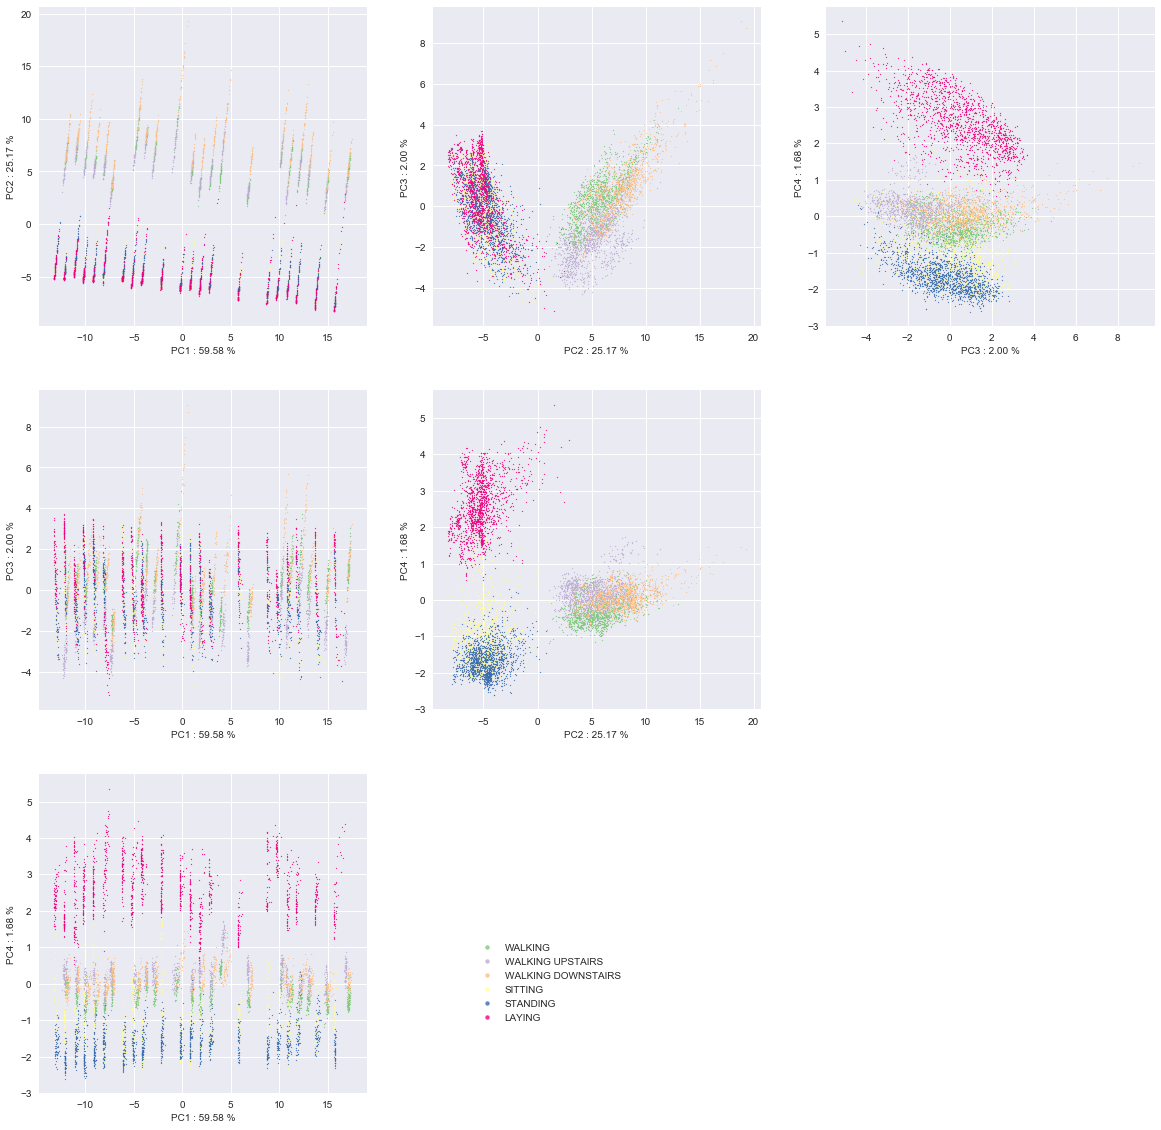

In [8]:
cmaps = plt.get_cmap("Accent")

fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(X_r, fig,ax,nbc,nbc2)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=4)

### Plot Feature importance

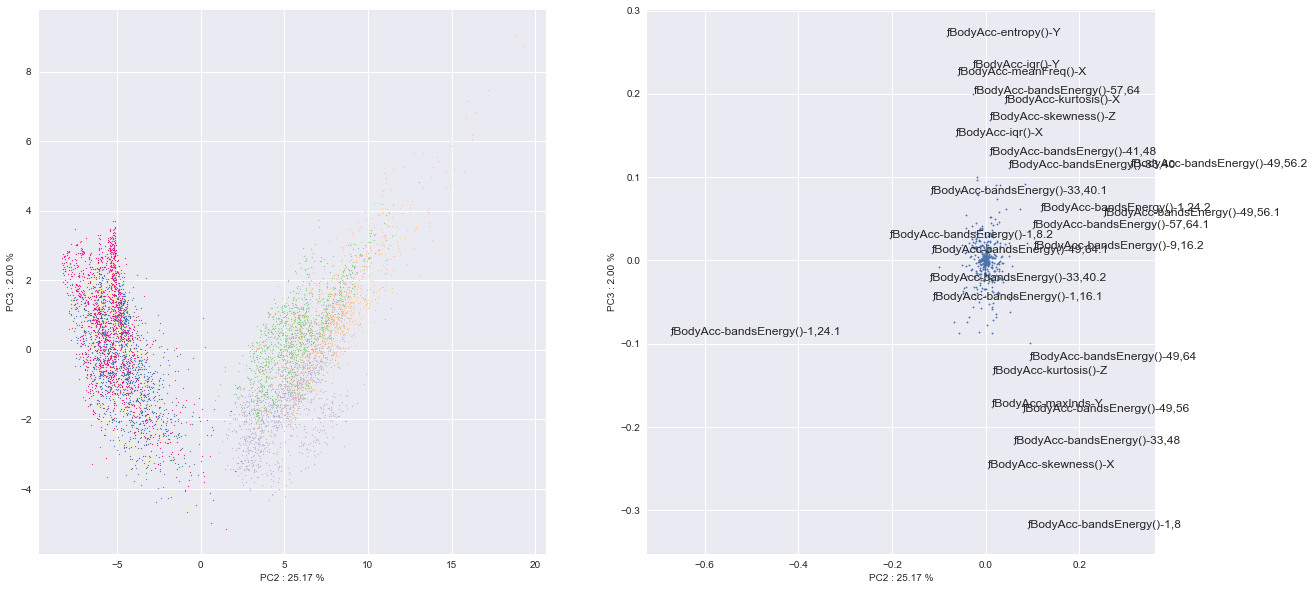

In [9]:
nbc=2
nbc2=3
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
plot_pca(X_r, fig,ax,nbc,nbc2)
ax=fig.add_subplot(1,2,2)
plot_feature_importance(pca, fig, ax, nbc, nbc2)

## Correlation Matrix

Matrice de corrélation entre les 50 features les plus important selon la première composante de l'ACP

In [16]:
# n most importance features according to component nbc
nbc=1
nf = 20

sb.set(style="white")
# Compute the correlation matrix
#corr = train.drop('Activity', axis=1).corr()
columns_importance = list(map(lambda x : train.columns[x[1]], sorted(list(zip(pca.components_[:,nbc-1],range(pca.n_components_))),
                                                key=lambda x : x[0], reverse=True)))[:nf]
corr = train[columns_importance].corr()

### Seaborn + Matplotlib

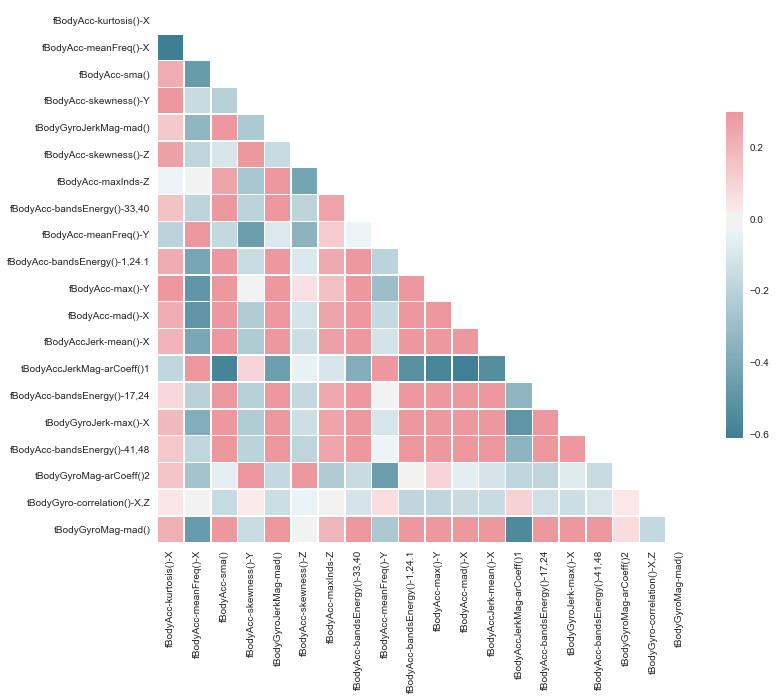

In [17]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,12))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Plotly + Cufflinks

In [18]:
corr.iplot(kind='heatmap', colorscale='-rdbu')

## sklearn.manifold.TSNE

Tentative de reproduction (sans succès) des résultats suivant http://www.mcmayer.net/t-sne-samsung/

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50.0)
Xtsne = tsne.fit_transform(X)

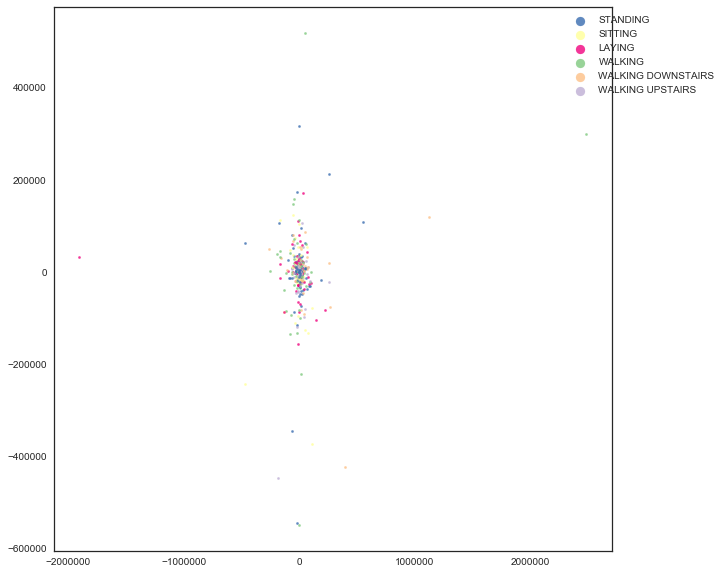

In [14]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
acts_int = []
for (x,y), act in zip(Xtsne[:1000]/1e12, train["Activity"].values):
    label = label_dic[act]
    color = cmaps(act-1)
    if act in acts_int:
        ax.scatter(x, y, color=color, alpha=.8, s=5)
    else :
        ax.scatter(x, y, color=color, alpha=.8, s=5, label = label)
        acts_int.append(act)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), markerscale=4)

In [15]:
y


-474.63805928822302